<a href="https://colab.research.google.com/github/shashi3876/kaggle/blob/main/CaloriePredictEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook contains the work done for the Kaggel playgorund competition named Predict Calorie Expenditure. THis notebook mainly focuses on the EDA.

In [ ]:
# imports

import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [ ]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [ ]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
train.isna().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,1
Body_Temp,1
Calories,1


In [ ]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,267621.000000,267621.000000,267621.000000,267621.00000,267621.000000,267620.000000,267620.000000,267620.000000
mean,133810.000000,41.386053,174.687435,75.12412,15.417419,95.489818,40.035642,88.318160
std,77255.672533,15.165333,12.835753,13.98481,8.366660,9.464739,0.781645,62.524317
min,0.000000,20.000000,129.000000,37.00000,1.000000,67.000000,37.100000,1.000000
25%,66905.000000,28.000000,164.000000,63.00000,8.000000,88.000000,39.600000,34.000000
50%,133810.000000,40.000000,174.000000,74.00000,15.000000,95.000000,40.300000,77.000000
75%,200715.000000,52.000000,185.000000,87.00000,23.000000,103.000000,40.700000,136.000000
max,267620.000000,79.000000,222.000000,132.00000,30.000000,128.000000,41.500000,314.000000


In [ ]:
test.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,41.452464,174.725624,75.147712,15.415428,95.479084,40.036093
std,72168.927986,15.177769,12.822039,13.979513,8.349133,9.450161,0.778448
min,750000.000000,20.000000,127.000000,39.000000,1.000000,67.000000,37.100000
25%,812499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,874999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,937499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,999999.000000,79.000000,219.000000,126.000000,30.000000,128.000000,41.500000


In [ ]:
train.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp','Calories']
categorical_cols = ['Gender']

train[numerical_cols].corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.012450,0.075355,0.017093,0.018546,0.031805,0.146796
Height,0.012450,1.000000,0.957751,-0.027224,-0.009822,-0.032199,-0.001121
Weight,0.075355,0.957751,1.000000,-0.017933,0.001233,-0.021306,0.019256
Duration,0.017093,-0.027224,-0.017933,1.000000,0.876047,0.903316,0.959973
Heart_Rate,0.018546,-0.009822,0.001233,0.876047,1.000000,0.796400,0.909236
Body_Temp,0.031805,-0.032199,-0.021306,0.903316,0.796400,1.000000,0.828799
Calories,0.146796,-0.001121,0.019256,0.959973,0.909236,0.828799,1.000000


# Some EDA Stuff

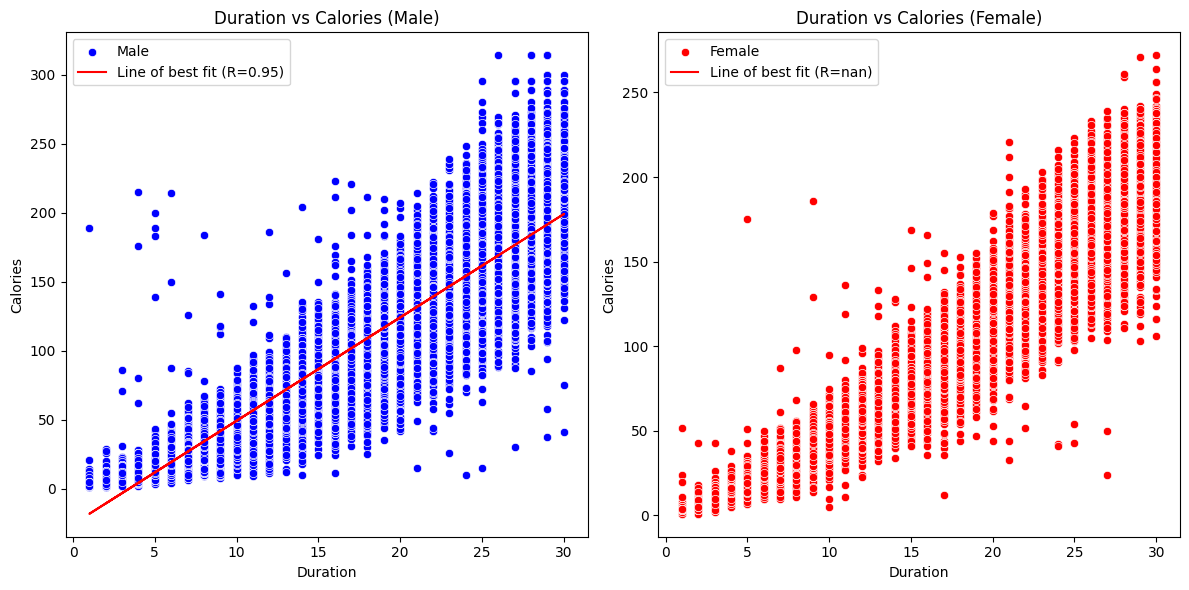

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.figure(figsize=(12, 6))

# Male plot
plt.subplot(1, 2, 1)
male_data = train[train['Sex'] == 'male']
slope, intercept, r_value, p_value, std_err = stats.linregress(male_data['Duration'], male_data['Calories'])
sns.scatterplot(x='Duration', y='Calories', data=male_data, color='blue', label='Male')
plt.plot(male_data['Duration'], intercept + slope * male_data['Duration'], 'r', label=f'Line of best fit (R={r_value:.2f})')
plt.title('Duration vs Calories (Male)')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.legend()

# Female plot
plt.subplot(1, 2, 2)
female_data = train[train['Sex'] == 'female']
slope, intercept, r_value, p_value, std_err = stats.linregress(female_data['Duration'], female_data['Calories'])
sns.scatterplot(x='Duration', y='Calories', data=female_data, color='red', label='Female')
plt.plot(female_data['Duration'], intercept + slope * female_data['Duration'], 'r', label=f'Line of best fit (R={r_value:.2f})')
plt.title('Duration vs Calories (Female)')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.legend()

plt.tight_layout()
plt.show()


# LIghtGBM model

In [ ]:
X = train.drop(columns=['id','Calories'])
y = train['Calories']

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import TargetEncoder
import lightgbm as lgb
import numpy as np

categorical_cols = ['Sex']
cv = KFold(n_splits=5, random_state=42, shuffle=True)  # Added n_splits for clarity
y_pred = np.zeros(len(test))

for idx_train, idx_valid in cv.split(X, y):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]
    X_test = test[X.columns].copy()

    encoder = TargetEncoder(random_state=42)

    # Reshape to 2D array for TargetEncoder
    X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]  # Use [[:Sex]] and extract first column
    X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
    X_test['Sex'] = encoder.transform(X_test[['Sex']])[:, 0]

    model = lgb.LGBMRegressor(
        n_iter=2000,
        max_depth=-1,
        num_leaves=1024,
        colsample_bytree=0.7,
        learning_rate=0.03,
        objective='l2',
        metric='rmse',
        verbosity=-1,
        max_bin=1024,
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        callbacks=[
            lgb.log_evaluation(100),
            lgb.early_stopping(stopping_rounds=100)
        ],
    )

    y_pred += model.predict(X_test)



<ipython-input-12-5d3687fc866c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]  # Use [[:Sex]] and extract first column
<ipython-input-12-5d3687fc866c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in param

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 5.3963
[200]	valid_0's rmse: 3.66863
[300]	valid_0's rmse: 3.61695
[400]	valid_0's rmse: 3.61354
Early stopping, best iteration is:
[381]	valid_0's rmse: 3.61311


<ipython-input-12-5d3687fc866c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]  # Use [[:Sex]] and extract first column
<ipython-input-12-5d3687fc866c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in param

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 5.46772
[200]	valid_0's rmse: 3.74685
[300]	valid_0's rmse: 3.6843
[400]	valid_0's rmse: 3.67669
[500]	valid_0's rmse: 3.6766
Early stopping, best iteration is:
[452]	valid_0's rmse: 3.67538


<ipython-input-12-5d3687fc866c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]  # Use [[:Sex]] and extract first column
<ipython-input-12-5d3687fc866c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in param

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 5.4308
[200]	valid_0's rmse: 3.67997
[300]	valid_0's rmse: 3.62215
[400]	valid_0's rmse: 3.61822
Early stopping, best iteration is:
[375]	valid_0's rmse: 3.6179


<ipython-input-12-5d3687fc866c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]  # Use [[:Sex]] and extract first column
<ipython-input-12-5d3687fc866c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in param

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 5.41635
[200]	valid_0's rmse: 3.64135
[300]	valid_0's rmse: 3.58618
[400]	valid_0's rmse: 3.58305
Early stopping, best iteration is:
[364]	valid_0's rmse: 3.58295


<ipython-input-12-5d3687fc866c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]  # Use [[:Sex]] and extract first column
<ipython-input-12-5d3687fc866c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in param

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 5.42512
[200]	valid_0's rmse: 3.68045
[300]	valid_0's rmse: 3.63194
[400]	valid_0's rmse: 3.62905
Early stopping, best iteration is:
[384]	valid_0's rmse: 3.62864


In [ ]:
pred_lgbm = y_pred /5
sample_submission=pd.read_csv('sample_submission.csv')
submission_lgbm = pd.DataFrame({'id': sample_submission.id, 'Calories' : pred_lgbm})
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import TargetEncoder
import lightgbm as lgb
import numpy as np

categorical_cols = ['Sex']
cv = KFold(n_splits=5, random_state=42, shuffle=True)
y_pred = np.zeros(len(test))

# Log-transform the target
y_log = np.log1p(y)  # Apply log1p to the target

for idx_train, idx_valid in cv.split(X, y):
    X_train, y_train = X.iloc[idx_train], y_log.iloc[idx_train]  # Use log-transformed y
    X_valid, y_valid = X.iloc[idx_valid], y_log.iloc[idx_valid]
    X_test = test[X.columns].copy()

    encoder = TargetEncoder(random_state=42)
    X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
    X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
    X_test['Sex'] = encoder.transform(X_test[['Sex']])[:, 0]

    model = lgb.LGBMRegressor(
        n_iter=2000,
        max_depth=-1,
        num_leaves=1024,
        colsample_bytree=0.7,
        learning_rate=0.03,
        objective='l2',
        metric='rmse',  # RMSE on log-transformed target = RMSLE
        verbosity=-1,
        max_bin=1024,
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        callbacks=[
            lgb.log_evaluation(100),
            lgb.early_stopping(stopping_rounds=100)
        ],
    )

    # Exponentiate predictions to revert log-transform
    y_pred += np.expm1(model.predict(X_test))  # expm1 = exp(x) - 1

y_pred /= cv.get_n_splits()

pred_lgbm = y_pred
sample_submission=pd.read_csv('sample_submission.csv')
submission_lgbm = pd.DataFrame({'id': sample_submission.id, 'Calories' : pred_lgbm})
submission_lgbm.to_csv('submission_lgbm.csv', index=False)

<ipython-input-14-de59d0bcb317>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-14-de59d0bcb317>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0833958
[200]	valid_0's rmse: 0.0607606
[300]	valid_0's rmse: 0.0602479
Early stopping, best iteration is:
[299]	valid_0's rmse: 0.0602458


<ipython-input-14-de59d0bcb317>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-14-de59d0bcb317>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.08477
[200]	valid_0's rmse: 0.0616701
[300]	valid_0's rmse: 0.0609527
[400]	valid_0's rmse: 0.060911
Early stopping, best iteration is:
[384]	valid_0's rmse: 0.0609088


<ipython-input-14-de59d0bcb317>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-14-de59d0bcb317>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0840187
[200]	valid_0's rmse: 0.0610396
[300]	valid_0's rmse: 0.0604926
Early stopping, best iteration is:
[299]	valid_0's rmse: 0.0604922


<ipython-input-14-de59d0bcb317>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-14-de59d0bcb317>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0835344
[200]	valid_0's rmse: 0.0613173
[300]	valid_0's rmse: 0.0608225
Early stopping, best iteration is:
[299]	valid_0's rmse: 0.0608208


<ipython-input-14-de59d0bcb317>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-14-de59d0bcb317>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0833248
[200]	valid_0's rmse: 0.0605265
[300]	valid_0's rmse: 0.0601228
Early stopping, best iteration is:
[299]	valid_0's rmse: 0.0601208


# Use of CatBoost with hyperparameter optimization

In [ ]:
import itertools
import os
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load / prepare training data
drop_cols = ['id', 'Calories']
X = train.drop(columns=drop_cols)
y = train['Calories']
cat_features = ['Sex']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.07, 0.1],
    'l2_leaf_reg': [3, 7],
    'iterations': [1000, 2000],
    'random_strength': [1, 5, 10],
    'bootstrap_type': ['Bayesian', 'Bernoulli'],
    'grow_policy': ['SymmetricTree', 'Depthwise']
}

# Convert grid to list of dicts (one per combination)
def expand_grid(param_grid):
    keys = list(param_grid.keys())
    values = list(param_grid.values())
    combos = list(itertools.product(*values))
    return [dict(zip(keys, combo)) for combo in combos]

all_combinations = expand_grid(param_grid)

# File to cache results
results_file = "catboost_grid_results_calorie.csv"
if os.path.exists(results_file):
    results_df = pd.read_csv(results_file)
else:
    results_df = pd.DataFrame(columns=list(param_grid.keys()) + ["rmse"])

# Run only for new combinations
new_results = []

for params in all_combinations:
    # Check if this combination has already been run
    mask = (results_df[list(params)] == pd.Series(params)).all(axis=1)
    if mask.any():
        print(f"✅ Skipping already-run: {params}")
        continue

    print(f"🚀 Running: {params}")
    try:
        model = CatBoostRegressor(cat_features=cat_features, verbose=0, **params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        rmse = sqrt(mean_squared_error(y_val, preds))
        print(f"→ RMSE: {rmse:.4f}")

        # Save result after each run
        result_row = {**params, 'rmse': rmse}
        results_df = pd.concat([results_df, pd.DataFrame([result_row])], ignore_index=True)
        results_df.to_csv(results_file, index=False)
        print(f"💾 Result saved to {results_file}")

    except Exception as e:
        print(f"❌ Error with params {params}: {e}")

# Append new results and save
if new_results:
    results_df = pd.concat([results_df, pd.DataFrame(new_results)], ignore_index=True)
    results_df.to_csv(results_file, index=False)
    print(f"💾 Results saved to {results_file}")

# Show best
best = results_df.sort_values('rmse').iloc[0]
print("\n🏆 Best Config:")
print(best)


🚀 Running: {'depth': 6, 'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 1000, 'random_strength': 1, 'bootstrap_type': 'Bayesian', 'grow_policy': 'SymmetricTree'}


KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

# Define columns to exclude from features
exclude_cols = ['id', 'Calories']
target_col = 'Calories'

# Split features and target from train
X_train = train.drop(columns=exclude_cols)
y_train = train[target_col]

# Log-transform the target for RMSLE
y_train_log = np.log1p(y_train)

# Prepare test set (same feature columns)
X_test = test.drop(columns=['id'])

# Identify categorical features
categorical_features = ['Sex']

# Initialize KFold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize array to store test predictions
test_preds = np.zeros(len(test))

# K-Fold Cross-Validation
for fold, (idx_train, idx_valid) in enumerate(cv.split(X_train, y_train)):
    print(f'\nFold {fold + 1}')

    # Split data
    X_tr, X_val = X_train.iloc[idx_train], X_train.iloc[idx_valid]
    y_tr, y_val = y_train_log.iloc[idx_train], y_train_log.iloc[idx_valid]

    # Define Pools
    train_pool = Pool(X_tr, y_tr, cat_features=categorical_features)
    val_pool = Pool(X_val, y_val, cat_features=categorical_features)
    test_pool = Pool(X_test, cat_features=categorical_features)

    # Train the model
    model = CatBoostRegressor(
        iterations=2000,
        learning_rate=0.03,
        depth=10,
        random_strength=5,
        l2_leaf_reg=7,
        bootstrap_type='Bernoulli',
        grow_policy='SymmetricTree',
        eval_metric='RMSE',  # RMSE on log-transformed target = RMSLE
        random_seed=42,
        early_stopping_rounds=50,
        verbose=100
    )

    model.fit(train_pool, eval_set=val_pool)

    # Predict on test set and revert log-transform
    fold_preds = np.expm1(model.predict(test_pool))
    test_preds += fold_preds

# Average predictions across folds
test_preds /= cv.get_n_splits()

# Add predictions to test dataframe
test['Calories'] = test_preds

# Optional: preview results
print(test[['id', 'Calories']].head())


Fold 1
0:	learn: 0.9365924	test: 0.9357482	best: 0.9357482 (0)	total: 107ms	remaining: 3m 34s
100:	learn: 0.0919908	test: 0.0918559	best: 0.0918559 (100)	total: 11.2s	remaining: 3m 30s
200:	learn: 0.0634851	test: 0.0637563	best: 0.0637563 (200)	total: 22.4s	remaining: 3m 20s
300:	learn: 0.0606817	test: 0.0612105	best: 0.0612105 (300)	total: 33.2s	remaining: 3m 7s
400:	learn: 0.0595963	test: 0.0603550	best: 0.0603550 (400)	total: 43.9s	remaining: 2m 55s
500:	learn: 0.0589179	test: 0.0599265	best: 0.0599265 (500)	total: 54.9s	remaining: 2m 44s
600:	learn: 0.0584143	test: 0.0596726	best: 0.0596726 (600)	total: 1m 5s	remaining: 2m 33s
700:	learn: 0.0580604	test: 0.0595477	best: 0.0595477 (700)	total: 1m 15s	remaining: 2m 20s
800:	learn: 0.0577864	test: 0.0594576	best: 0.0594576 (800)	total: 1m 26s	remaining: 2m 10s
900:	learn: 0.0575390	test: 0.0593915	best: 0.0593915 (900)	total: 1m 38s	remaining: 1m 59s
1000:	learn: 0.0573009	test: 0.0593484	best: 0.0593483 (999)	total: 1m 49s	remaining

## Simple ensemble

In [ ]:
lgbm = pd.read_csv('submission_lgbm (2).csv')
catboost = pd.read_csv('catboost_k_fold.csv')

# Merge the two dataframes on 'id'
merged = pd.merge(lgbm[['id', 'Calories']], catboost[['id', 'Calories']],
                  on='id', suffixes=('_lgbm', '_catboost'))

# Calculate the average of the two calorie columns
merged['Calories'] = merged[['Calories_lgbm', 'Calories_catboost']].mean(axis=1)

# Result: id and average calories
result = merged[['id', 'Calories']]
result.to_csv('ensemble_catboost_lgbm.csv',index=False)

# Linear regression for two groups

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Define columns to exclude from features
exclude_cols = ['id', 'Calories']
target_col = 'Calories'

# Convert 'Sex' to binary (1 for Male, 0 for Female)
train['Sex'] = train['Sex'].map({'Male': 1, 'Female': 0})
test['Sex'] = test['Sex'].map({'Male': 1, 'Female': 0})

# Split features and target from train
X_train = train.drop(columns=exclude_cols)
y_train = train[target_col]

# Log-transform the target for RMSLE
y_train_log = np.log1p(y_train)

# Prepare test set (same feature columns)
X_test = test.drop(columns=['id'])

# Check for non-numeric columns
print("Data types in X_train:\n", X_train.dtypes)
print("Data types in X_test:\n", X_test.dtypes)

# Check for infinite values
print("Infinite values in X_train:", np.any(np.isinf(X_train)))
print("Infinite values in X_test:", np.any(np.isinf(X_test)))

# Check for zero-variance features
std_dev = X_train.std()
zero_variance_cols = std_dev[std_dev == 0].index
print("Zero-variance columns:", zero_variance_cols.tolist())

# Remove zero-variance columns (if any)
if len(zero_variance_cols) > 0:
    print(f"Removing zero-variance columns: {zero_variance_cols.tolist()}")
    X_train = X_train.drop(columns=zero_variance_cols)
    X_test = X_test.drop(columns=zero_variance_cols)

# Initialize StandardScaler
scaler = StandardScaler()

# Initialize KFold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize array to store test predictions
test_preds = np.zeros(len(test))

# Define hyperparameter grid for Ridge regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'fit_intercept': [True, False]
}

# K-Fold Cross-Validation
for fold, (idx_train, idx_valid) in enumerate(cv.split(X_train, y_train)):
    print(f'\nFold {fold + 1}')

    # Split data
    X_tr, X_val = X_train.iloc[idx_train], X_train.iloc[idx_valid]
    y_tr, y_val = y_train_log.iloc[idx_train], y_train_log.iloc[idx_valid]

    # Scale features, with handling for zero-variance
    try:
        X_tr_scaled = scaler.fit_transform(X_tr)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        # Check for NaN after scaling
        if np.any(np.isnan(X_tr_scaled)):
            print(f"NaN values introduced in X_tr_scaled for fold {fold + 1}")
            break
        if np.any(np.isnan(X_val_scaled)):
            print(f"NaN values introduced in X_val_scaled for fold {fold + 1}")
            break
        if np.any(np.isnan(X_test_scaled)):
            print(f"NaN values introduced in X_test_scaled for fold {fold + 1}")
            break
    except Exception as e:
        print(f"Scaling error in fold {fold + 1}: {e}")
        break

    # Initialize Ridge regression model
    model = Ridge(random_state=42)

    # Perform GridSearchCV for hyperparameter optimization
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',  # Optimize for MSE on log-transformed target
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    try:
        grid_search.fit(X_tr_scaled, y_tr)
    except Exception as e:
        print(f"Error in GridSearchCV for fold {fold + 1}: {e}")
        continue

    # Best model from grid search
    best_model = grid_search.best_estimator_
    print(f"Best parameters for fold {fold + 1}: {grid_search.best_params_}")

    # Predict on validation set and compute RMSLE
    val_preds_log = best_model.predict(X_val_scaled)
    val_preds = np.expm1(val_preds_log)  # Revert log-transform
    y_val_orig = np.expm1(y_val)
    rmsle = np.sqrt(mean_squared_error(np.log1p(y_val_orig), np.log1p(val_preds)))
    print(f"Fold {fold + 1} RMSLE: {rmsle:.4f}")

    # Predict on test set
    fold_preds = np.expm1(best_model.predict(X_test_scaled))
    test_preds += fold_preds

# Average predictions across folds
test_preds /= cv.get_n_splits()

# Add predictions to test dataframe
test['Calories'] = test_preds

# Optional: preview results
print(test[['id', 'Calories']].head())

Data types in X_train:
 Sex           float64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object
Data types in X_test:
 Sex           float64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object
Infinite values in X_train: False
Infinite values in X_test: False
Zero-variance columns: []

Fold 1
NaN values introduced in X_tr_scaled for fold 1
       id  Calories
0  750000       0.0
1  750001       0.0
2  750002       0.0
3  750003       0.0
4  750004       0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
len(test)

250000

# Adding more features

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
train['bmi']=train['Weight']/(train['Height']*train['Height'])*100*100
test['bmi']=test['Weight']/(test['Height']*test['Height'])*100*100

In [ ]:
train.isna().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0
dur_body_heart,0


In [ ]:
train['dur_body_heart']=train['Duration']*train['Heart_Rate']*train['Body_Temp']
test['dur_body_heart']=test['Duration']*test['Heart_Rate']*test['Body_Temp']

In [ ]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,dur_body_heart,bmi
0,750000,male,45,177.0,81.0,7.0,87.0,39.8,24238.2,25.854639
1,750001,male,26,200.0,97.0,20.0,101.0,40.5,81810.0,24.250000
2,750002,female,29,188.0,85.0,16.0,102.0,40.4,65932.8,24.049344
3,750003,female,39,172.0,73.0,20.0,107.0,40.6,86884.0,24.675500
4,750004,female,30,173.0,67.0,16.0,94.0,40.5,60912.0,22.386314


In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp','dur_body_heart','bmi','Calories']
categorical_cols = ['Gender']

train[numerical_cols].corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,dur_body_heart,bmi,Calories
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.018018,0.192326,0.145683
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.025914,0.522518,-0.004026
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,-0.016432,0.739634,0.015863
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.993797,0.006132,0.959908
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.905330,0.023468,0.908748
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.876757,0.008812,0.828671
dur_body_heart,0.018018,-0.025914,-0.016432,0.993797,0.905330,0.876757,1.000000,0.009719,0.977763
bmi,0.192326,0.522518,0.739634,0.006132,0.023468,0.008812,0.009719,1.000000,0.049226
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,0.977763,0.049226,1.000000


In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import TargetEncoder
import lightgbm as lgb
import numpy as np


X = train.drop(columns=['id','Calories'])
y = train['Calories']


categorical_cols = ['Sex']
cv = KFold(n_splits=5, random_state=42, shuffle=True)
y_pred = np.zeros(len(test))

# Log-transform the target
y_log = np.log1p(y)  # Apply log1p to the target

for idx_train, idx_valid in cv.split(X, y):
    X_train, y_train = X.iloc[idx_train], y_log.iloc[idx_train]  # Use log-transformed y
    X_valid, y_valid = X.iloc[idx_valid], y_log.iloc[idx_valid]
    X_test = test[X.columns].copy()

    encoder = TargetEncoder(random_state=42)
    X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
    X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
    X_test['Sex'] = encoder.transform(X_test[['Sex']])[:, 0]

    model = lgb.LGBMRegressor(
        n_iter=2000,
        max_depth=-1,
        num_leaves=1024,
        colsample_bytree=0.7,
        learning_rate=0.03,
        objective='l2',
        metric='rmse',  # RMSE on log-transformed target = RMSLE
        verbosity=-1,
        max_bin=1024,
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        callbacks=[
            lgb.log_evaluation(100),
            lgb.early_stopping(stopping_rounds=100)
        ],
    )

    # Exponentiate predictions to revert log-transform
    y_pred += np.expm1(model.predict(X_test))  # expm1 = exp(x) - 1

y_pred /= cv.get_n_splits()

pred_lgbm = y_pred
sample_submission=pd.read_csv('sample_submission.csv')
submission_lgbm = pd.DataFrame({'id': sample_submission.id, 'Calories' : pred_lgbm})
submission_lgbm.to_csv('submission_lgbm_new.csv', index=False)

<ipython-input-37-e425b7455be7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-37-e425b7455be7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.078388
[200]	valid_0's rmse: 0.0599891
[300]	valid_0's rmse: 0.0599029
Early stopping, best iteration is:
[260]	valid_0's rmse: 0.0598745


<ipython-input-37-e425b7455be7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-37-e425b7455be7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0800206
[200]	valid_0's rmse: 0.0611991
[300]	valid_0's rmse: 0.0609157
[400]	valid_0's rmse: 0.0609216
Early stopping, best iteration is:
[336]	valid_0's rmse: 0.060894


<ipython-input-37-e425b7455be7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-37-e425b7455be7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0788375
[200]	valid_0's rmse: 0.0601791
[300]	valid_0's rmse: 0.0600399
Early stopping, best iteration is:
[264]	valid_0's rmse: 0.0600214


<ipython-input-37-e425b7455be7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-37-e425b7455be7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0786666
[200]	valid_0's rmse: 0.0606576
[300]	valid_0's rmse: 0.0605465
Early stopping, best iteration is:
[251]	valid_0's rmse: 0.060539


<ipython-input-37-e425b7455be7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
<ipython-input-37-e425b7455be7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.0787008
[200]	valid_0's rmse: 0.0601532
[300]	valid_0's rmse: 0.0600358
Early stopping, best iteration is:
[269]	valid_0's rmse: 0.0599843


In [ ]:
train.isna().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,1
Body_Temp,1
Calories,1
bmi,0


## HP Tuning with new features

In [ ]:
import itertools
import os
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load / prepare training data
drop_cols = ['id', 'Calories']
X = train.drop(columns=drop_cols)
y = train['Calories']
cat_features = ['Sex']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Log-transform the target for RMSLE
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

# Parameter grid
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.03, 0.07, 0.1],
    'l2_leaf_reg': [3, 7],
    'iterations': [1000, 2000],
    'random_strength': [1, 5, 10],
    'bootstrap_type': ['Bayesian', 'Bernoulli'],
    'grow_policy': ['SymmetricTree', 'Depthwise']
}

# Convert grid to list of dicts (one per combination)
def expand_grid(param_grid):
    keys = list(param_grid.keys())
    values = list(param_grid.values())
    combos = list(itertools.product(*values))
    return [dict(zip(keys, combo)) for combo in combos]

all_combinations = expand_grid(param_grid)

# File to cache results
results_file = "catboost_grid_results_calorie_rmsle.csv"
if os.path.exists(results_file):
    results_df = pd.read_csv(results_file)
else:
    results_df = pd.DataFrame(columns=list(param_grid.keys()) + ["rmsle"])

# Run only for new combinations
new_results = []

for params in all_combinations:
    # Check if this combination has already been run
    mask = (results_df[list(params)] == pd.Series(params)).all(axis=1)
    if mask.any():
        print(f"✅ Skipping already-run: {params}")
        continue

    print(f"🚀 Running: {params}")
    try:
        model = CatBoostRegressor(cat_features=cat_features, verbose=0, eval_metric='RMSE', **params)
        # Train on log-transformed target
        model.fit(X_train, y_train_log)
        # Predict and compute RMSLE
        preds_log = model.predict(X_val)
        rmsle = sqrt(mean_squared_error(y_val_log, preds_log))
        print(f"→ RMSLE: {rmsle:.4f}")

        # Save result after each run
        result_row = {**params, 'rmsle': rmsle}
        results_df = pd.concat([results_df, pd.DataFrame([result_row])], ignore_index=True)
        results_df.to_csv(results_file, index=False)
        print(f"💾 Result saved to {results_file}")

    except Exception as e:
        print(f"❌ Error with params {params}: {e}")

# Append new results and save
if new_results:
    results_df = pd.concat([results_df, pd.DataFrame(new_results)], ignore_index=True)
    results_df.to_csv(results_file, index=False)
    print(f"💾 Results saved to {results_file}")

# Show best
best = results_df.sort_values('rmsle').iloc[0]
print("\n🏆 Best Config:")
print(best)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

# Define columns to exclude from features
exclude_cols = ['id', 'Calories']
target_col = 'Calories'

# Split features and target from train
X_train = train.drop(columns=exclude_cols)
y_train = train[target_col]

# Log-transform the target for RMSLE
y_train_log = np.log1p(y_train)

# Prepare test set (same feature columns)
X_test = test.drop(columns=['id'])

# Identify categorical features
categorical_features = ['Sex']

# Initialize KFold
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Initialize array to store test predictions
test_preds = np.zeros(len(test))

# K-Fold Cross-Validation
for fold, (idx_train, idx_valid) in enumerate(cv.split(X_train, y_train)):
    print(f'\nFold {fold + 1}')

    # Split data
    X_tr, X_val = X_train.iloc[idx_train], X_train.iloc[idx_valid]
    y_tr, y_val = y_train_log.iloc[idx_train], y_train_log.iloc[idx_valid]

    # Define Pools
    train_pool = Pool(X_tr, y_tr, cat_features=categorical_features)
    val_pool = Pool(X_val, y_val, cat_features=categorical_features)
    test_pool = Pool(X_test, cat_features=categorical_features)

    # Train the model
    model = CatBoostRegressor(
        iterations=2000,
        learning_rate=0.03,
        depth=10,
        random_strength=10,
        l2_leaf_reg=3,
        bootstrap_type='Bernoulli',
        grow_policy='SymmetricTree',
        eval_metric='RMSE',  # RMSE on log-transformed target = RMSLE
        random_seed=42,
        early_stopping_rounds=100,
        verbose=100
    )

    model.fit(train_pool, eval_set=val_pool)

    # Predict on test set and revert log-transform
    fold_preds = np.expm1(model.predict(test_pool))
    test_preds += fold_preds

# Average predictions across folds
test_preds /= cv.get_n_splits()

# Add predictions to test dataframe
test['Calories'] = test_preds

# Optional: preview results
test[['id','Calories']].to_csv('catboost_k_fold_new_hpt.csv',index=False)
print(test[['id', 'Calories']].head())

# Trying XGBoost

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import TargetEncoder
import xgboost as xgb
import numpy as np
import pandas as pd

categorical_cols = ['Sex']
cv = KFold(n_splits=5, random_state=42, shuffle=True)
y_pred = np.zeros(len(test))

# Log-transform the target
y_log = np.log1p(y)  # log(1 + y) for RMSLE-friendly training

for idx_train, idx_valid in cv.split(X, y):
    X_train, y_train = X.iloc[idx_train].copy(), y_log.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid].copy(), y_log.iloc[idx_valid]
    X_test = test[X.columns].copy()

    # Target Encoding for categorical column
    encoder = TargetEncoder(random_state=42)
    X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
    X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
    X_test['Sex'] = encoder.transform(X_test[['Sex']])[:, 0]

    model = xgb.XGBRegressor(
        n_estimators=2000,
        max_depth=10,
        learning_rate=0.03,
        subsample=0.7,
        colsample_bytree=0.7,
        objective='reg:squarederror',  # L2 loss
        eval_metric='rmse',
        early_stopping_rounds=100,
        random_state=42,
        verbosity=1,
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=100
    )

    y_pred += np.expm1(model.predict(X_test))

# Average predictions over folds
y_pred /= cv.get_n_splits()

# Create submission file
pred_xgb = y_pred
sample_submission = pd.read_csv('sample_submission.csv')
submission_xgb = pd.DataFrame({'id': sample_submission.id, 'Calories': pred_xgb})
submission_xgb.to_csv('submission_xgb.csv', index=False)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import TargetEncoder
import xgboost as xgb
import numpy as np
import pandas as pd

categorical_cols = ['Sex']

# Discretize 'duration' into 5 bins for stratification
duration_bins = pd.qcut(X['Duration'], q=5, labels=False, duplicates='drop')

# Use StratifiedKFold for stratified splitting based on duration bins
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
y_pred = np.zeros(len(test))

# Log-transform the target
y_log = np.log1p(y)  # log(1 + y) for RMSLE-friendly training

for idx_train, idx_valid in cv.split(X, duration_bins):
    X_train, y_train = X.iloc[idx_train].copy(), y_log.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid].copy(), y_log.iloc[idx_valid]
    X_test = test[X.columns].copy()

    # Target Encoding for categorical column
    encoder = TargetEncoder(random_state=42)
    X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
    X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
    X_test['Sex'] = encoder.transform(X_test[['Sex']])[:, 0]

    model = xgb.XGBRegressor(
        n_estimators=2000,
        max_depth=10,
        learning_rate=0.03,
        subsample=0.7,
        colsample_bytree=0.7,
        objective='reg:squarederror',  # L2 loss
        eval_metric='rmse',
        early_stopping_rounds=100,
        random_state=42,
        verbosity=1,
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=100
    )

    y_pred += np.expm1(model.predict(X_test))

# Average predictions over folds
y_pred /= cv.get_n_splits()

# Create submission file
pred_xgb = y_pred
sample_submission = pd.read_csv('sample_submission.csv')
submission_xgb = pd.DataFrame({'id': sample_submission.id, 'Calories': pred_xgb})
submission_xgb.to_csv('submission_xgb.csv', index=False)

# HP Tuning with XGBoost

In [ ]:
import itertools
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
import xgboost as xgb

# Load / prepare data (assuming X, y, test, and sample_submission are already defined)
categorical_cols = ['Sex']

# Discretize 'Duration' into 5 bins for stratification
duration_bins = pd.qcut(X['Duration'], q=5, labels=False, duplicates='drop')

# Parameter grid for XGBoost
param_grid = {
    'max_depth': [6, 8, 10],
    'learning_rate': [0.03, 0.07, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'n_estimators': [1000, 2000],
    'min_child_weight': [1, 5]
}

# Convert grid to list of dicts (one per combination)
def expand_grid(param_grid):
    keys = list(param_grid.keys())
    values = list(param_grid.values())
    combos = list(itertools.product(*values))
    return [dict(zip(keys, combo)) for combo in combos]

all_combinations = expand_grid(param_grid)

# File to cache results
results_file = "xgboost_grid_results_calorie_rmsle.csv"
if os.path.exists(results_file):
    results_df = pd.read_csv(results_file)
else:
    results_df = pd.DataFrame(columns=list(param_grid.keys()) + ["rmsle"])

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Log-transform the target
y_log = np.log1p(y)

# Run only for new combinations
new_results = []

for params in all_combinations:
    # Check if this combination has already been run
    mask = (results_df[list(params)] == pd.Series(params)).all(axis=1)
    if mask.any():
        print(f"✅ Skipping already-run: {params}")
        continue

    print(f"🚀 Running: {params}")
    try:
        rmsle_scores = []
        for idx_train, idx_valid in cv.split(X, duration_bins):
            X_train, y_train = X.iloc[idx_train].copy(), y_log.iloc[idx_train]
            X_valid, y_valid = X.iloc[idx_valid].copy(), y_log.iloc[idx_valid]

            # Target Encoding for categorical column
            encoder = TargetEncoder(random_state=42)
            X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
            X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]

            # Initialize XGBoost model
            model = xgb.XGBRegressor(
                objective='reg:squarederror',
                eval_metric='rmse',
                early_stopping_rounds=100,
                random_state=42,
                verbosity=0,
                **params
            )

            # Train model
            model.fit(
                X_train, y_train,
                eval_set=[(X_valid, y_valid)],
                verbose=False
            )

            # Predict and compute RMSLE
            preds_log = model.predict(X_valid)
            rmsle = sqrt(mean_squared_error(y_valid, preds_log))
            rmsle_scores.append(rmsle)

        # Average RMSLE across folds
        avg_rmsle = np.mean(rmsle_scores)
        print(f"→ Average RMSLE: {avg_rmsle:.4f}")

        # Save result after each run
        result_row = {**params, 'rmsle': avg_rmsle}
        results_df = pd.concat([results_df, pd.DataFrame([result_row])], ignore_index=True)
        results_df.to_csv(results_file, index=False)
        print(f"💾 Result saved to {results_file}")

    except Exception as e:
        print(f"❌ Error with params {params}: {e}")

# Show best configuration
best = results_df.sort_values('rmsle').iloc[0]
print("\n🏆 Best Config:")
print(best)

# Optionally, train final model with best parameters and generate submission
print("\nTraining final model with best parameters...")
y_pred = np.zeros(len(test))
best_params = best.drop('rmsle').to_dict()

for idx_train, idx_valid in cv.split(X, duration_bins):
    X_train, y_train = X.iloc[idx_train].copy(), y_log.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid].copy(), y_log.iloc[idx_valid]
    X_test = test[X.columns].copy()

    # Target Encoding
    encoder = TargetEncoder(random_state=42)
    X_train['Sex'] = encoder.fit_transform(X_train[['Sex']], y_train)[:, 0]
    X_valid['Sex'] = encoder.transform(X_valid[['Sex']])[:, 0]
    X_test['Sex'] = encoder.transform(X_test[['Sex']])[:, 0]

    # Train model with best parameters
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        eval_metric='rmse',
        early_stopping_rounds=100,
        random_state=42,
        verbosity=0,
        **best_params
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=False
    )

    y_pred += np.expm1(model.predict(X_test))

# Average predictions over folds
y_pred /= cv.get_n_splits()

# Create submission file
submission_xgb = pd.DataFrame({'id': sample_submission['id'], 'Calories': y_pred})
submission_xgb.to_csv('submission_xgb_tuned.csv', index=False)
print("💾 Submission file saved as 'submission_xgb_tuned.csv'")

# Ensemble using the two best cases

In [ ]:
data1=pd.read_csv('submission_xgb (1).csv')
data2=pd.read_csv('catboost_5_fold_str (1).csv')

data = data1.merge(data2, on='id', suffixes=('_xgb', '_cat'))

# 1. Simple average of the two predictions
data['Calories_avg'] = (data['Calories_xgb'] + data['Calories_cat']) / 2

# 2. Log-scale average (RMSLE-style averaging)
data['Calories_log_avg'] = np.expm1(
    (np.log1p(data['Calories_xgb']) + np.log1p(data['Calories_cat'])) / 2
)

print(data[['id', 'Calories_xgb', 'Calories_cat', 'Calories_avg', 'Calories_log_avg']].head())

# Save simple average with 'Calories' as the second column
data[['id', 'Calories_avg']].rename(columns={'Calories_avg': 'Calories'}).to_csv('submission_reg_avg.csv', index=False)

# Save log-scale average with 'Calories' as the second column
data[['id', 'Calories_log_avg']].rename(columns={'Calories_log_avg': 'Calories'}).to_csv('submission_log_avg.csv', index=False)